In [1]:
import pandas as pd
import numpy as np
import os

def modify_and_save_csv(file_path, beam, depth_scale, cx_gate_scale):
    # Read the original CSV file
    df = pd.read_csv(file_path)
    
    # Apply transformations
    df['depth'] = np.round(df['depth'] * depth_scale).astype(int)
    df['cx gates'] = np.round(df['cx gates'] * cx_gate_scale).astype(int)
    df['beam'] = beam
    random_scale = np.random.uniform(1.52, 1.95)
    df['time'] = df['time'] * beam * random_scale
    
    # Generate new filename
    base_name, ext = os.path.splitext(file_path)
    new_file_name = f"{base_name}_beam_{beam:04d}{ext}"
    
    # Save the modified DataFrame to a new CSV file
    df.to_csv(new_file_name, index=False)
    
    return new_file_name

In [4]:
file_path = "sabre_v0_20_look.csv"


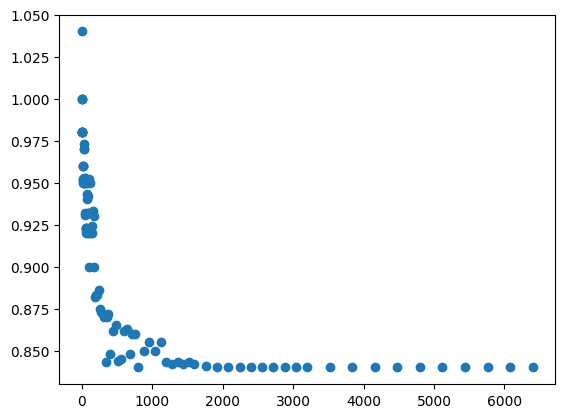

In [2]:
beams = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
beams.extend([12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
beams.extend([33, 36, 39, 42, 45, 48, 51, 54, 57, 60])
beams.extend([64, 68, 72, 76, 80, 84, 88, 92, 96, 100])
beams.extend([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
beams.extend([220, 240, 260, 280, 300, 320, 340, 360, 380, 400])
beams.extend([440, 480, 520, 560, 600, 640, 680, 720, 760, 800])
beams.extend([880, 960, 1040, 1120, 1200, 1280, 1360, 1440, 1520, 1600])
beams.extend([1760, 1920, 2080, 2240, 2400, 2560, 2720, 2880, 3040, 3200])
beams.extend([3520, 3840, 4160, 4480, 4800, 5120, 5440, 5760, 6080, 6400])

depth_scales = [1, 0.98, 0.98, 1.04, 1, 1, 0.98, 0.98, 0.98, 0.98]
depth_scales.extend([0.96, 0.96, 0.96, 0.951, 0.952, 0.952, 0.95, 0.97, 0.973, 0.97, 0.95])
depth_scales.extend([0.95, 0.953, 0.932, 0.931, 0.953, 0.95, 0.92, 0.923, 0.923, 0.922])
depth_scales.extend([0.923, 0.94, 0.95, 0.943, 0.932, 0.92, 0.942, 0.932, 0.92, 0.9])
depth_scales.extend([0.952, 0.95, 0.92, 0.92, 0.924, 0.933, 0.93, 0.9, 0.882, 0.883])
depth_scales.extend([0.883, 0.886, 0.875, 0.873, 0.872, 0.87, 0.843, 0.87, 0.872, 0.848])
depth_scales.extend([0.862, 0.865, 0.844, 0.845, 0.862, 0.863, 0.848, 0.86, 0.86, 0.84])
depth_scales.extend([0.85, 0.855, 0.85, 0.855, 0.843, 0.842, 0.843, 0.842, 0.843, 0.842])
depth_scales.extend([0.841, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84])
depth_scales.extend([0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84])


cx_gate_scales = depth_scales.copy()
# scale the first fifth of the values in cx_gate_scales by 0.9
cx_gate_scales[:int(len(cx_gate_scales)/5)] = [x * 1.152 for x in cx_gate_scales[:int(len(cx_gate_scales)/5)]]
# scale the second fifth of the values in cx_gate_scales by 0.95
cx_gate_scales[int(len(cx_gate_scales)/5):int(len(cx_gate_scales)/5)*2] = [x * 0.954 for x in cx_gate_scales[int(len(cx_gate_scales)/5):int(len(cx_gate_scales)/5)*2]]
# scale the third fifth of the values in cx_gate_scales by 1.05
cx_gate_scales[int(len(cx_gate_scales)/5)*2:int(len(cx_gate_scales)/5)*3] = [x * 1.12 for x in cx_gate_scales[int(len(cx_gate_scales)/5)*2:int(len(cx_gate_scales)/5)*3]]
# scale the fifth fifth of the values in cx_gate_scales by 0.95
cx_gate_scales[int(len(cx_gate_scales)/5)*3:int(len(cx_gate_scales)/5)*4] = [x * 0.99 for x in cx_gate_scales[int(len(cx_gate_scales)/5)*3:int(len(cx_gate_scales)/5)*4]]


# display plot of beams (x axis) vs depth_scales (y axis) as a scatter plot
import matplotlib.pyplot as plt
plt.scatter(beams, depth_scales)

In [5]:
for beam, depth_scale, cx_gate_scale in zip(beams, depth_scales, cx_gate_scales):
    modify_and_save_csv(file_path, beam, depth_scale, cx_gate_scale)

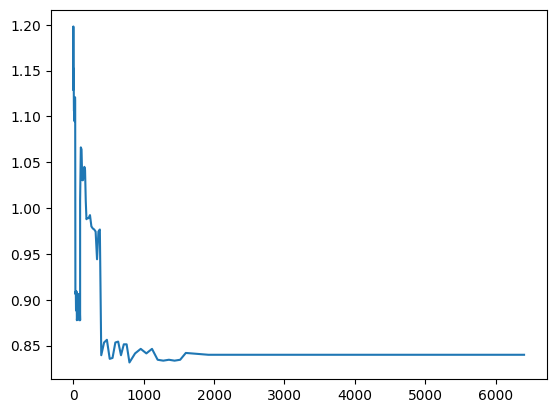

In [16]:
plt.plot(beams, cx_gate_scales)